In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn import preprocessing

In [2]:
# import some data to play with
iris = datasets.load_iris()

In [ ]:
iris

In [4]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
iris['DESCR']

In [6]:
#compines data and target
dataarray=np.c_[iris['data'], iris['target']]

In [ ]:
dataarray

In [7]:
iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [9]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [14]:
iris['feature_names'] + ['target']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)',
 'target']

In [15]:
#convert to dataframe
df = pd.DataFrame(data= dataarray,
                     columns= iris['feature_names'] + ['target'])

In [16]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [ ]:
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= ['slength','swidth','plength','pwidth','target'])

In [ ]:
df.head()

,slength,swidth,plength,pwidth,target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [ ]:
df['slength'].max()

7.9

In [ ]:
df['slength'].min()

4.3

In [ ]:
#select petal information only
petalinfo=df[['plength','pwidth','target']]
by_type = petalinfo.groupby("target")

In [ ]:
by_type.describe()

plength                             ... pwidth                    
         count   mean       std  min  25%  ...    min  25%  50%  75%  max
target                                     ...                           
0.0       50.0  1.462  0.173664  1.0  1.4  ...    0.1  0.2  0.2  0.3  0.6
1.0       50.0  4.260  0.469911  3.0  4.0  ...    1.0  1.2  1.3  1.5  1.8
2.0       50.0  5.552  0.551895  4.5  5.1  ...    1.4  1.8  2.0  2.3  2.5

[3 rows x 16 columns]

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(2, figsize=(8, 6))
plt.clf()

<Figure size 576x432 with 0 Axes>

Text(0, 0.5, 'Petal width')

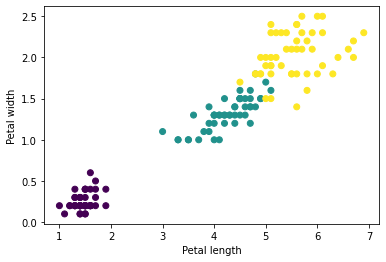

In [ ]:
# Plot the training points
plt.scatter(petalinfo.plength, petalinfo.pwidth, c=petalinfo.target)
plt.xlabel('Petal length')
plt.ylabel('Petal width')

In [ ]:
#normalize to 0 ... 1
min_max_scaler = preprocessing.MinMaxScaler()
petalinfo['normplength']= min_max_scaler.fit_transform(petalinfo[['plength']])
petalinfo['normpwidth']= min_max_scaler.fit_transform(petalinfo[['pwidth']])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
petalinfo.head()

,plength,pwidth,target,normplength,normpwidth
0,1.4,0.2,0.0,0.067797,0.041667
1,1.4,0.2,0.0,0.067797,0.041667
2,1.3,0.2,0.0,0.050847,0.041667
3,1.5,0.2,0.0,0.084746,0.041667
4,1.4,0.2,0.0,0.067797,0.041667


In [ ]:
#normalize to newmin ... newmax
newmin=0
newmax=10
x=petalinfo.plength
petalinfo['normplength']= (x-min(x))/(max(x)-min(x))*(newmax-newmin)+newmin
x=petalinfo.pwidth
petalinfo['normpwidth']= (x-min(x))/(max(x)-min(x))*(newmax-newmin)+newmin
petalinfo.head(10)

,plength,pwidth,target,normplength,normpwidth
0,1.4,0.2,0.0,0.677966,0.416667
1,1.4,0.2,0.0,0.677966,0.416667
2,1.3,0.2,0.0,0.508475,0.416667
3,1.5,0.2,0.0,0.847458,0.416667
4,1.4,0.2,0.0,0.677966,0.416667
5,1.7,0.4,0.0,1.186441,1.250000
6,1.4,0.3,0.0,0.677966,0.833333
7,1.5,0.2,0.0,0.847458,0.416667
8,1.4,0.2,0.0,0.677966,0.416667
9,1.5,0.1,0.0,0.847458,0.000000


Text(0, 0.5, 'Sepal width')

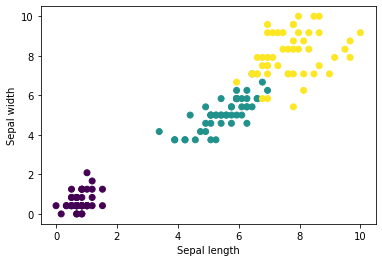

In [ ]:
plt.scatter(petalinfo.normplength, petalinfo.normpwidth, c=petalinfo.target)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

Text(0, 0.5, 'Sepal length')

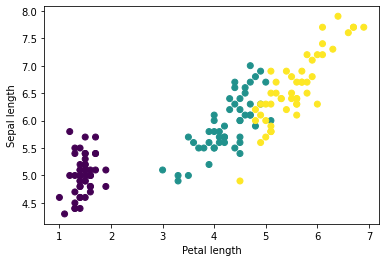

In [ ]:
# Plot the training points
plt.scatter(df.plength, df.slength, c=df.target)
plt.xlabel('Petal length')
plt.ylabel('Sepal length')

In [ ]:
#center around 0 with equal variance
from sklearn import preprocessing
X=df[['plength','slength']]
y=df.target
X_scaled = preprocessing.scale(X)
print('unscaled mean: {} and standard deviation: {}'.format(X.mean(),X.std()))
print('scaled mean: {} and standard deviation: {}'.format(X_scaled.mean(), X_scaled.std()))

unscaled mean: plength    3.758000
slength    5.843333
dtype: float64 and standard deviation: plength    1.765298
slength    0.828066
dtype: float64
scaled mean: -1.4684549872375404e-15 and standard deviation: 1.0


In [ ]:
#x_scaled[:,1].shape

Text(0, 0.5, 'Sepal length')

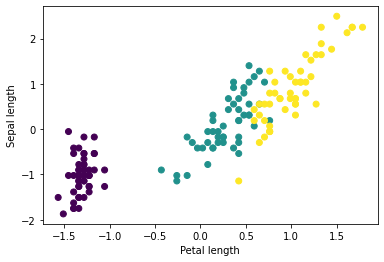

In [ ]:
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=df.target)
plt.xlabel('Petal length')
plt.ylabel('Sepal length')